In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import corner.corner
from emcee.autocorr import integrated_time
from impulse.base import Sampler, PTSampler

# test model things:
from test_model import make_sin_data, LnLikelihood, LnPrior

In [2]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)

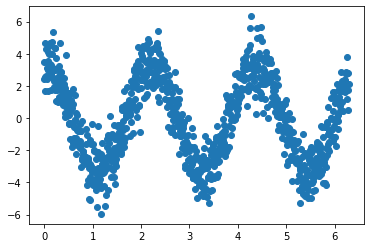

In [3]:
plt.scatter(x, data)

In [4]:
like = LnLikelihood(x, data)
prior = LnPrior([0, 0, 0], [3, 5, np.pi])

In [5]:
x0 = prior.initial_sample()
ndim = len(x0)

In [6]:
ntemps = 4
ncores = 4
sampler = Sampler(ndim, like, prior, ntemps=ntemps, ncores=ncores, adapt=True, tinf=True)
# sampler = PTSampler(ndim, like, prior)

In [7]:
x0 = np.vstack([prior.initial_sample() for i in range(ntemps)])
chain = sampler.sample(x0, num_samples=1_000_000, ret_chain=True)

  5%|▌         | 506/10000 [00:08<02:16, 69.73it/s](PTSampler pid=59231) /Users/aaron/Documents/GitHub/impulse_mcmc/impulse/proposals.py:253: RuntimeWarning: invalid value encountered in double_scalars
(PTSampler pid=59231)   q[groups[jumpind][ii]] += scale * sigma
(PTSampler pid=59231) /Users/aaron/Documents/GitHub/impulse_mcmc/impulse/mhsampler.py:23: RuntimeWarning: invalid value encountered in double_scalars
(PTSampler pid=59231)   lnprob_star = 1 / temp * lnlike_star + lnprior_star
100%|██████████| 10000/10000 [02:11<00:00, 75.79it/s]


In [8]:
burn = int(0.25 * chain[0].shape[0])
omega = np.median(chain[0][burn:, 0])
a = np.median(chain[0][burn:, 1])
phi = np.median(chain[0][burn:, 2])

In [9]:
print(omega, omega_real)
print(a, a_real)
print(phi, phi_real)

2.9055190000849276 2.915948723878425
3.3384622967395385 3.327787321891218
1.4426216131576202 1.3871570253458072


In [31]:
with open('./chains/temp_data/temps.txt', 'r') as f:
    temps = np.loadtxt(f)

with open('./chains/temp_data/accept.txt', 'r') as f:
    accept = np.loadtxt(f)

/var/folders/bt/hxhr8xxx7d11f4lwfyj1_b580000gn/T/ipykernel_57997/3406890032.py:2: UserWarning: loadtxt: Empty input file: "<_io.TextIOWrapper name='./chains/temp_data/temps.txt' mode='r' encoding='UTF-8'>"
  temps = np.loadtxt(f)
/var/folders/bt/hxhr8xxx7d11f4lwfyj1_b580000gn/T/ipykernel_57997/3406890032.py:5: UserWarning: loadtxt: Empty input file: "<_io.TextIOWrapper name='./chains/temp_data/accept.txt' mode='r' encoding='UTF-8'>"
  accept = np.loadtxt(f)


In [10]:
plt.figure(figsize=(12, 5))
for ii in range(ntemps - 1):
    # plt.plot(temps[:, ii])
    plt.plot(accept[:, ii])
plt.show()

plt.figure(figsize=(12, 5))
for ii in range(ntemps - 1):
    plt.plot(temps[:, ii])
    # plt.plot(accept[:, ii])
plt.show()

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

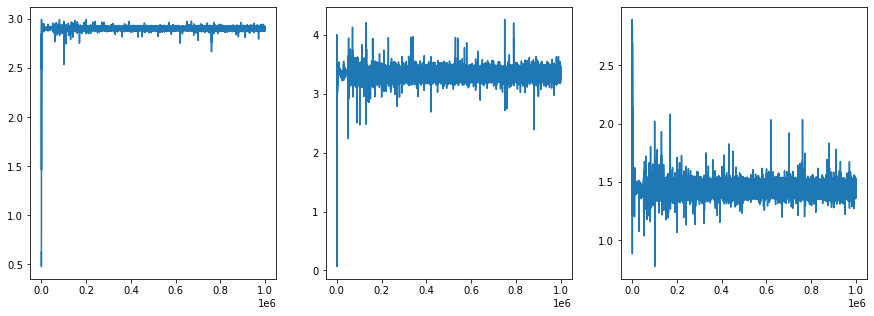

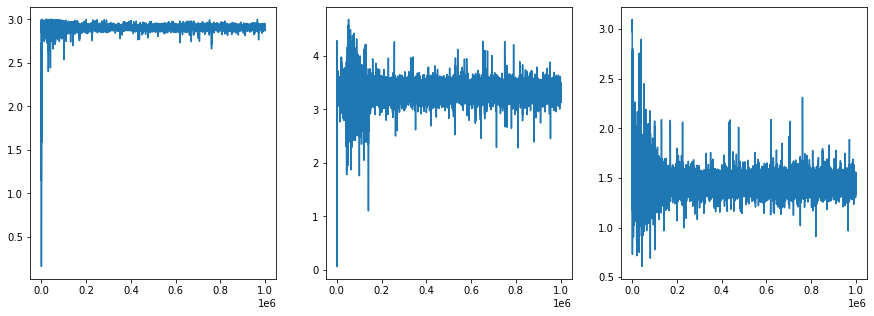

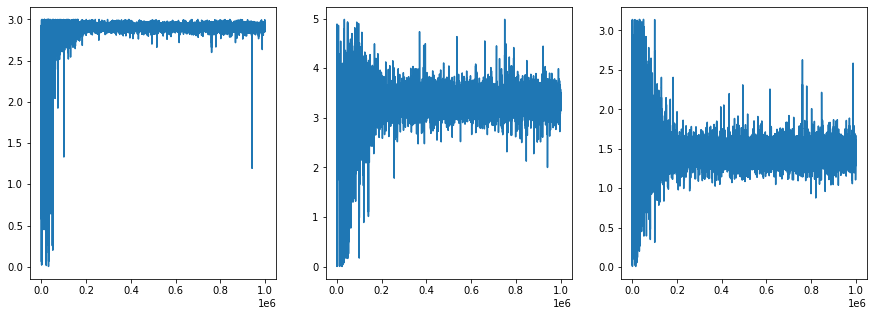

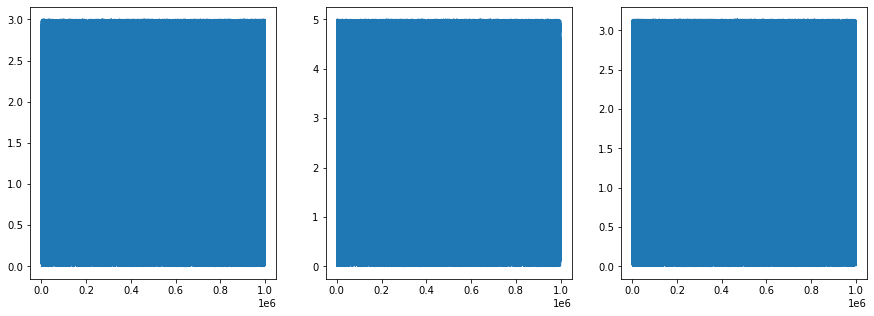

In [10]:
for ii in range(ntemps):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(chain[ii, :, 0])
    ax[1].plot(chain[ii, :, 1])
    ax[2].plot(chain[ii, :, 2])
    plt.show()

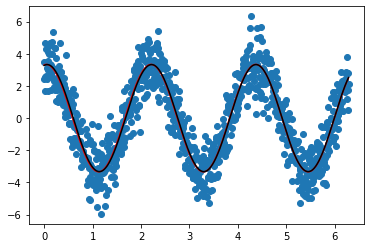

In [11]:
plt.scatter(x, data)
plt.plot(x, a * np.sin(omega * x + phi), color='red')
plt.plot(x, a_real * np.sin(omega_real * x + phi_real), color='black')

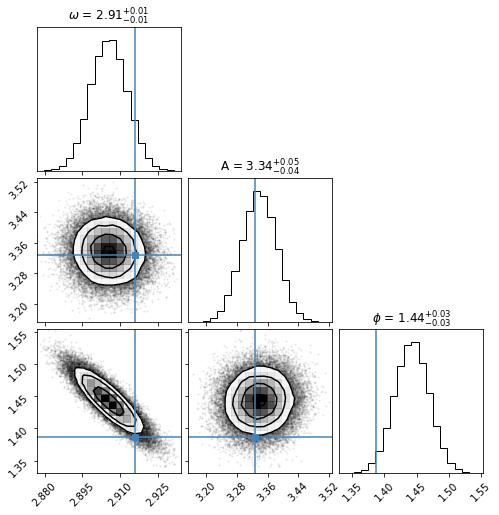

In [15]:
corner.corner(chain[0, 2 * burn::10, :], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'A', r'$\phi$'], show_titles=True)
plt.show()

In [19]:
print(omega_real, a_real, phi_real)
print(omega, a, phi)

2.915948723878425 3.327787321891218 1.3871570253458072
2.9055190000849276 3.3384622967395385 1.4426216131576202


In [28]:
print(integrated_time(chain[0, 50_000:, 1]))

[14.90727722]
